In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

height, width = 200, 100
size = (height, width)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)
test_datagen = ImageDataGenerator(rescale=1./255)

training_data_path = "../data/raw/images/training"
testing_data_path = "../data/raw/images/testing"

train_generator = train_datagen.flow_from_directory(training_data_path, target_size=size,batch_size=32,
                                                    class_mode='binary', subset='training')

validation_generator = train_datagen.flow_from_directory(training_data_path, target_size=size,
                                                         batch_size=32, class_mode='binary',subset='validation')

test_generator = test_datagen.flow_from_directory(testing_data_path, shuffle=True, target_size=size, batch_size=32,
                                                  class_mode='binary')

Found 1914 images belonging to 2 classes.
Found 478 images belonging to 2 classes.
Found 597 images belonging to 2 classes.


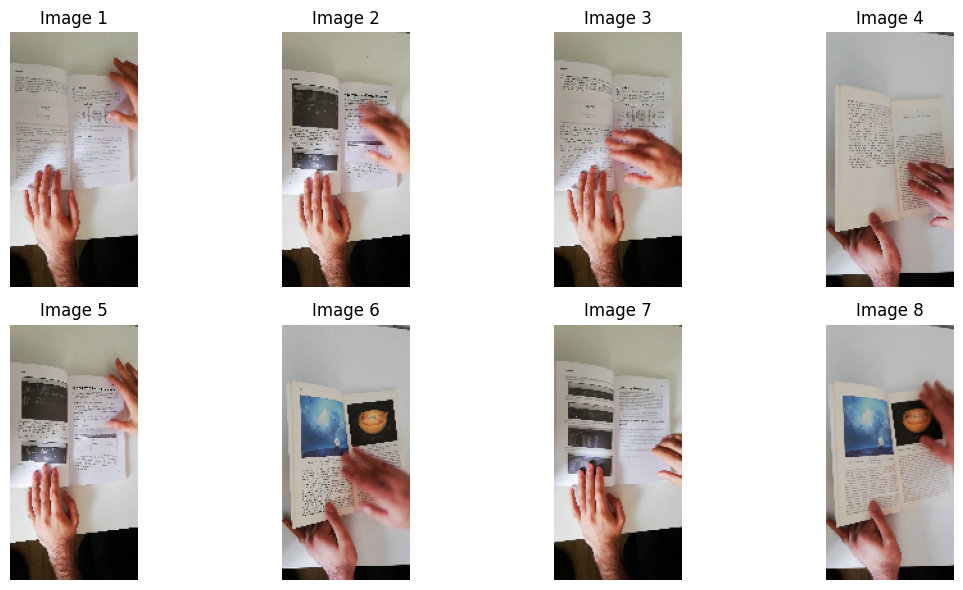

In [12]:
import matplotlib.pyplot as plt
import keras.utils as image
import os

# Directory containing your test images
test_dir = training_data_path + "/notflip"

# Get list of filenames in the test directory
filenames = os.listdir(test_dir)

# Set up subplot dimensions
cols = 4
rows = 2

# Set up matplotlib figure
fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

# Loop through the filenames and display first 8 images (you can change this as needed)
for i in range(rows * cols):
    img_path = os.path.join(test_dir, filenames[i])
    img = image.load_img(img_path, target_size=size)  # Load image and resize it
    ax = axes[i // cols, i % cols]
    ax.imshow(img)
    ax.set_title(f"Image {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [22]:
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), 
              metrics=[tfa.metrics.F1Score(num_classes=1, average='micro', threshold=0.5)]
)


In [23]:
history = model.fit(train_generator, epochs=100, validation_data=validation_generator)

Epoch 1/100
60/60 [==============================] - 120s 2s/step - loss: 0.6965 - f1_score: 0.5954 - val_loss: 0.6898 - val_f1_score: 0.5447
Epoch 2/100
60/60 [==============================] - 120s 2s/step - loss: 0.6821 - f1_score: 0.6281 - val_loss: 0.6964 - val_f1_score: 0.3990
Epoch 3/100
60/60 [==============================] - 116s 2s/step - loss: 0.6794 - f1_score: 0.6217 - val_loss: 0.6852 - val_f1_score: 0.6269
Epoch 4/100
60/60 [==============================] - 118s 2s/step - loss: 0.6707 - f1_score: 0.6198 - val_loss: 0.6884 - val_f1_score: 0.6119
Epoch 5/100
60/60 [==============================] - 114s 2s/step - loss: 0.6580 - f1_score: 0.6569 - val_loss: 0.6804 - val_f1_score: 0.6479
Epoch 6/100
60/60 [==============================] - 159s 3s/step - loss: 0.6544 - f1_score: 0.6580 - val_loss: 0.6684 - val_f1_score: 0.6385
Epoch 7/100
60/60 [==============================] - 118s 2s/step - loss: 0.6468 - f1_score: 0.6763 - val_loss: 0.6791 - val_f1_score: 0.7005
Epoch 

In [24]:
test_loss, test_f1 = model.evaluate(test_generator)

print(f'Test loss: {test_loss:.4f}')
print(f'Test F1 score: {test_f1:.4f}')

19/19 [==============================] - 18s 947ms/step - loss: 0.2403 - f1_score: 0.9141
Test loss: 0.2403
Test F1 score: 0.9141


In [25]:
model.save('MonReader.h5')

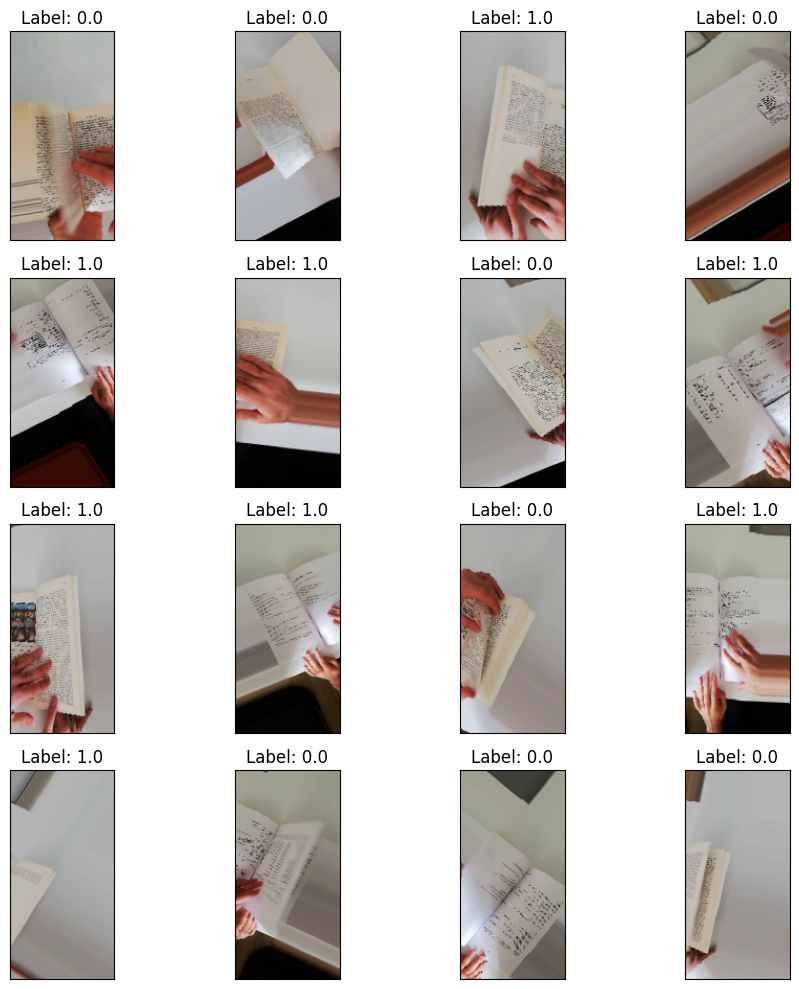

In [26]:
import matplotlib.pyplot as plt

# ... (Your previous code for importing libraries and setting up train_generator)

# Get a batch of images and labels from the train_generator
x_batch, y_batch = next(train_generator)

# Define the number of images to display
num_images_to_display = 16

# Create a grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop over the axes to plot each image
for i, ax in enumerate(axes.flat):
    # Display an image at the i-th position
    ax.imshow(x_batch[i])
    
    # Display the label as the title
    ax.set_title(f'Label: {y_batch[i]}')
    
    # Hide grid lines
    ax.grid(False)
    
    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust layout so plots are not overlapping
plt.tight_layout()

# Show the plot
plt.show()
